In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Merge the two data frames into a single data frame
merged_data = pd.merge(mouse_metadata, study_results,on="Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#Check for mice with duplicate timepoint values
mouse_check = merged_data.copy()
mouse_check = mouse_check.groupby('Mouse ID')['Timepoint'].value_counts().max()
mouse_check
#since this returns 2, there is at least one mouse with two entries for a single timepoint

2

In [6]:
#checking number of mice
len(merged_data["Mouse ID"].unique())

249

In [7]:
mouse = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
mouse

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [8]:
#remove data for any mouse with duplicate timepoints
cleaned_mice = merged_data.copy()

cleaned_mice = cleaned_mice[cleaned_mice["Mouse ID"].isin(mouse)==False]

cleaned_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
#confirming that duplicate entries were dropped
len(cleaned_mice["Mouse ID"].unique())

248

In [10]:
#find the mean of tumor volume for each drug regimen
regimen_mean = cleaned_mice.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#find the median of the tumor volume for each drug regimen
regimen_median = cleaned_mice.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#find the variance of the tumor volume for each drug regimen
regimen_variance = cleaned_mice.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_variance


Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#find the standard deviation for the tumor volume of each drug regimen

regimen_std = cleaned_mice.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#find the SEM of tumor volume for each drug regimen
regimen_sem = cleaned_mice.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#create a new data frame to summarize the data

summary_df = pd.DataFrame({"Mean" : regimen_mean, "Median" : regimen_median, "Variance" : regimen_variance, "Standard Deviation" : regimen_std, "SEM" : regimen_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
#create a working copy of the cleaned dataframe
timepoints_df = cleaned_mice.copy()

#find the number of timepoints for each drug regimen by using .value_counts() on the Drug Regimen column

timepoints_counts = timepoints_df.value_counts("Drug Regimen")

timepoints_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

Text(0.5, 1.0, 'Number of Timepoints of All Mice for Each Drug Regimen')

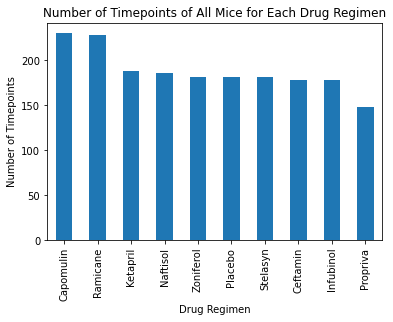

In [22]:
#create a bar graph of all timepoints for mice in each drug regimen using Pandas dataframe.plot() 
timepoints_counts.plot(kind="bar")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints of All Mice for Each Drug Regimen")

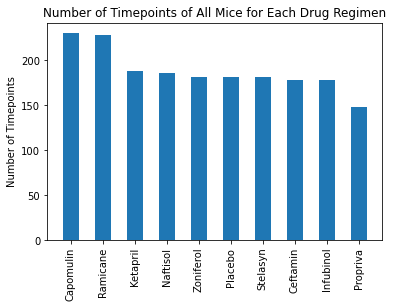

In [41]:
#create a bar graph of all timepoints for mice in each drug regimen using Matplotlib pyplot
x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
width = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
plt.bar(x_axis, timepoints_counts, align="center", width=width)
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints of All Mice for Each Drug Regimen")
plt.xticks(rotation = 90)

plt.show()
